In [1]:
import sys
sys.path.append('D:/v1ktop/Drive-INAOE/Code/data_aumentation_for_author_profiling/')

In [2]:
from word_level_da.preprocessing.load_data import Dataset

In [3]:
 %load_ext autoreload

In [4]:
 %autoreload 2

In [5]:
key="anorexia18_local"

In [6]:
data_cls=Dataset(key=key, remove_end=True, chunking=True, doc_len=64, min_len=32)

## Explore data

In [7]:
from word_level_da.classifier.explore_data import explore_data
from word_level_da.classifier.feature_extraction import FeatureExtraction
from word_level_da.classifier.svm_text import Svm_Text

In [10]:
all_training= data_cls.get_dataset(folder_name="prep_chunks_joined", truth_name="train_golden_truth_joined.txt",
                              partition="training")

In [11]:
exp_cls=explore_data(all_training[0], all_training[1], "D:/", plot_format="png")

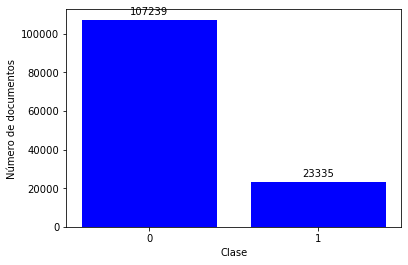

In [12]:
exp_cls.plot_class_distribution()

## Palabras dependientes de la clase incluyendo palabras de paro con p<0.001

In [13]:
ft=FeatureExtraction(all_training[0], w_range=(1,1), stop_wors=None, use_idf=True)

In [14]:
top_words_with_stop=ft.get_chi_2(all_training[1], p=0.001)

In [15]:
print("Numero de palabras")
len(top_words_with_stop)

Numero de palabras


1031

In [17]:
top_words_with_stop[0:100]

,score,pval
feel,342.693299,0.0
comfortable,40.722593,0.0
body,290.714964,0.0
depression,169.327905,0.0
herself,38.449619,0.0
...,...,...
thin,83.161583,0.0
struggled,71.916678,0.0
day,101.730182,0.0
week,78.590130,0.0


In [18]:
top_words_with_stop[-100:-1]

,score,pval
therapeutic,11.940685,0.000549
breast,11.937914,0.000550
ill,11.918978,0.000556
trigger,11.900786,0.000561
invitations,11.871744,0.000570
...,...,...
search,10.924626,0.000949
market,10.902304,0.000960
nparents,10.900043,0.000962
post,10.887046,0.000968


In [19]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [34]:
#! pip install multidict

In [20]:
import multidict as multidict

In [21]:
def getFrequencyDictForText(table):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for index, row in table.items():
        tmpDict[index] = int(row)
        
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

In [23]:
top_words_with_stop[0:5].score

feel           342.693299
comfortable     40.722593
body           290.714964
depression     169.327905
herself         38.449619
Name: score, dtype: float64

In [25]:
wc = WordCloud(background_color="white", max_words=50, mask=None, max_font_size=150, width=1200, height=720)

In [26]:
wc.generate_from_frequencies(getFrequencyDictForText(top_words_with_stop[0:50].score))

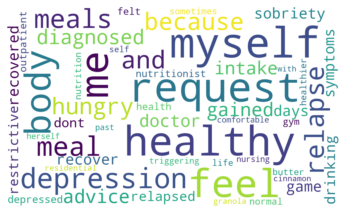

In [27]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
wc.to_file("D:/chi2_words_depresion.png")

## Clasificación con CHI2 considerando palabras de paro

In [29]:
from word_level_da.classifier.svm_text import Svm_Text

In [30]:
doc_test=\
data_cls.get_dataset(folder_name="prep_chunks", truth_name="golden_truth.txt", partition="test")

FileNotFoundError: [Errno 2] No such file or directory: 'D:/corpus/anorexia/2019/golden_truth.txt'

In [31]:
len(doc_test[0])

NameError: name 'doc_test' is not defined

In [77]:
svm= Svm_Text(all_training[0], all_training[1], True)

In [78]:
svm.extract_features(doc_test[0], feature="word", method="tf-idf", nrange1=(1,1) , nrange2=None, 
     k=len(top_words_with_stop), stop_words=None, norm="l2", idf=True, feature_selection=True, reduce_method="Xi")


# Features:  (258585, 1080)
Training:  (258585, 1080)
Testing:  (298670, 1080)


In [79]:
len(doc_test[3])

2

In [80]:
score= svm.train_and_test(doc_test[1], doc_test[3])

In [81]:
score

[1080,
 0.7829268292682927,
 0.2857142857142857,
 0.8354430379746836,
 0.42580645161290326]

scoreDistribución en la clase positiva

In [82]:
positive_docs=[]
positive_labels=[]

In [83]:
for doc, label  in zip(all_training[0],all_training[1]):
    if label==1:
        positive_docs.append(doc)
        positive_labels.append(label)
        

In [84]:
len(positive_docs)

31396

In [85]:
exp_cls_p=explore_data(positive_docs, positive_labels, "D:/", plot_format="png")

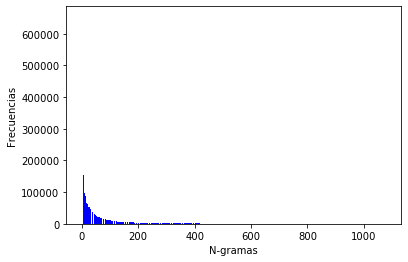

In [86]:
exp_cls.plot_frequency_distribution_of_word_list(
    ngram_range=(1,1), show_labels=False,
    by_docs=False, word_list=top_words_with_stop.index)

### Frecuencia clase positiva

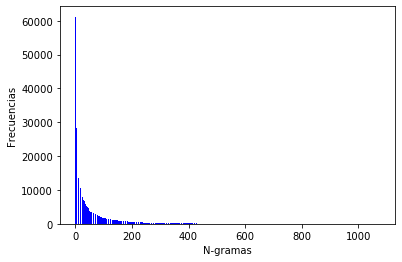

In [87]:
exp_cls_p.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=False, word_list=top_words_with_stop.index)

### Frecuencia por documentos

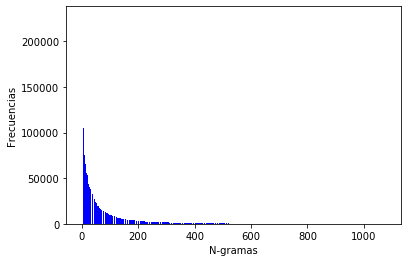

In [88]:
exp_cls.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=True, word_list=top_words_with_stop.index)

### Clase positiva

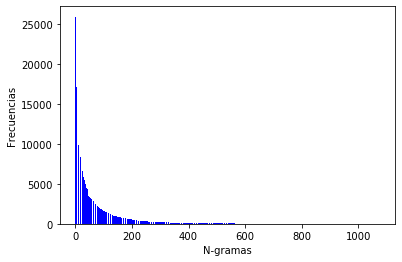

In [89]:
exp_cls_p.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=True, word_list=top_words_with_stop.index)

In [90]:
negative_docs=[]
negative_labels=[]

In [91]:
for doc, label in zip(all_training[0], all_training[1]):
    if label==0:
        negative_docs.append(doc)
        negative_labels.append(label)
        

In [92]:
len(negative_docs)

227189

In [93]:
exp_cls_n=explore_data(negative_docs, negative_labels, "D:/", plot_format="png")

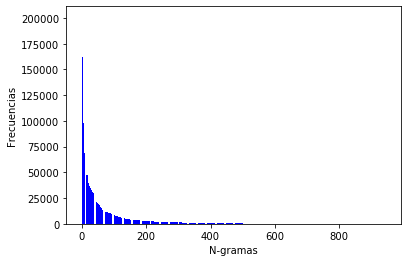

In [94]:
exp_cls_n.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=True, word_list=top_words_with_stop.index)